# Credit Card Fraud Detection using KNN
Step 1: Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings 
warnings.filterwarnings("ignore")

Step 2: Load and Explore Dataset

In [17]:
raw_data = pd.read_csv("creditcard.csv")
raw_data.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
print(raw_data['Class'].value_counts())
print(raw_data.info())

Class
0    284315
1       492
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float

<Axes: >

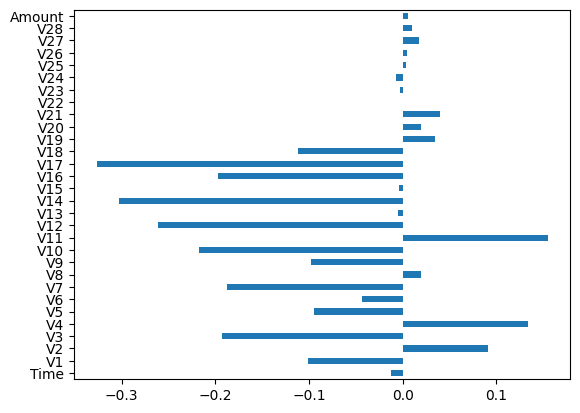

In [19]:
corr = raw_data.corr()["Class"].drop(["Class"])
corr.plot(kind = "barh")

Step 3: Feature Preparation & Scaling


In [20]:
X = raw_data.drop("Class", axis=1)
y = raw_data["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 4: Train/Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Step 5: Model Training (KNN)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Step 6: Model Evaluation

In [23]:
y_pred = knn.predict(X_test)

print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


y_proba = knn.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)



Accuracy_score: 0.9994265182636377
Confusion Matrix:
 [[85285    10]
 [   39   109]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.74      0.82       148

    accuracy                           1.00     85443
   macro avg       0.96      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.918789637870475


#### Bonus point -  Choosing the correct value of k

In [26]:
k = 10
accuracy = np.zeros((k))
std_acc = np.zeros((k))
for n in range(1,k+1):
    knn_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = knn_model.predict_proba(X_test)[:,1]
    accuracy[n-1] = roc_auc_score(y_test,yhat)

In [27]:
print(f"The best Roc-Aoc Score of model is {accuracy.max()} at k = {accuracy.argmax()+1} ")

The best Roc-Aoc Score of model is 0.9221447266482146 at k = 6 


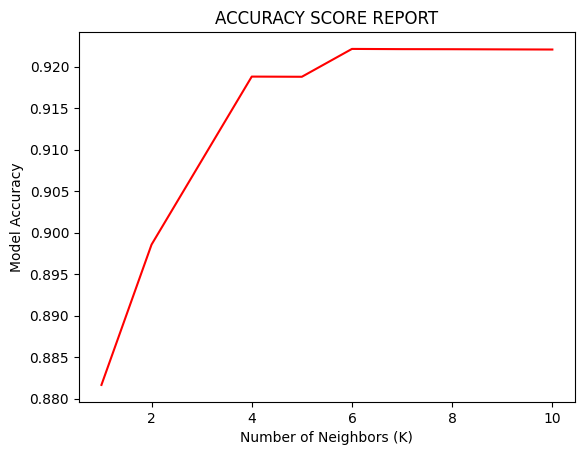

In [28]:
plt.plot(range(1,k+1),accuracy,"r")
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.title("ACCURACY SCORE REPORT")
plt.show()